In [56]:
# 조건으로 검색하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
dat = pd.read_csv("./data/2019_1인가구.csv", encoding='cp949') ; dat
dat_2019 = dat.copy()

In [60]:
## [데이터 필요한 행만 전처리] 

dat_2019.rename(columns={
    '가계지출금액' : '전체소비지출','가계지출_소비지출금액' : '소비지출','가계지출_소비지출_식료품비주류음료구입비' : '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비' : '식료품_곡물구입','가계지출_소비지출_식료품비주류음료_곡물가공품구입비' : '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비' : '식료품_빵떡류구입','가계지출_소비지출_식료품비주류음료_육류구입비' : '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비' : '식료품_육류가공품구입','가계지출_소비지출_식료품비주류음료_신선수산동물구입비' : '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비' : '식료품_염건수산동물구입','가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비' : '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비' : '식료품_유제품알구입','가계지출_소비지출_식료품비주류음료_유지류구입비' : '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비' : '식료품_과일가공품구입','가계지출_소비지출_식료품비주류음료_채소가공품구입비' : '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비' : '식료품_해조가공품구입','가계지출_소비지출_식료품비주류음료_당류과자류구입비' : '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비' : '식료품_조미식품구입','가계지출_소비지출_식료품비주류음료_기타식품구입비' : '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비' : '식료품_커피차구입','가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비' : '식료품_쥬스음료구입',
    '가계지출_소비지출_주류담배구입비' : '주류담배구입','가계지출_소비지출_주류담배_주류구입비' : '주류구입','가계지출_소비지출_주류담배_담배구입비' : '담배구입',
    '가계지출_소비지출_의류신발구입비' : '의류신발구입','가계지출_소비지출_의류신발_직물및외의구입비' : '의류신발_직물및외의구입','가계지출_소비지출_의류신발_내의구입비' : '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비' : '의류신발_기타의복구입','가계지출_소비지출_의류신발_의복관련서비스구입비' : '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비' : '의류신발_신발구입','가계지출_소비지출_의류신발_신발서비스구입비' : '의류신발_신발서비스구입','가계지출_소비지출_주거수도광열비' : '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비' : '주거수도광열_실제주거비구입','가계지출_소비지출_주거수도광열_주택유지수선구입비' : '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비' : '주거수도광열_상하수도폐기물처리','가계지출_소비지출_주거수도광열_기타주거관련서비스구입비' : '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비' : '주거수도광열_연료비구입','가계지출_소비지출_가정용품가사서비스이용금액' : '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비' : '가정용품가사서비스_가구조명구입','가계지출_소비지출_가정용품가사서비스_실내장식구입비' : '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액' : '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비' : '가정용품가사서비스_가정용섬유구입','가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비' : '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액' : '가정용품가사서비스_가전관련서비스이용','가계지출_소비지출_가정용품가사서비스_가사용품구입비' : '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비' : '가정용품가사서비스_가정용공구기타구입','가계지출_소비지출_가정용품가사서비스_가사소모품구입비' : '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액' : '가정용품가사서비스_가사서비스','가계지출_소비지출_보건제품구입비' : '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비' : '보건_의약품구입','가계지출_소비지출_보건_의료용소모품구입비' : '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비' : '보건_보건의료용품기구구입','가계지출_소비지출_보건_외래의료서비스이용금액' : '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액' : '보건_치과서비스이용','가계지출_소비지출_보건_기타의료서비스이용금액' : '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액' : '보건_입원서비스이용','가계지출_소비지출_교통비' : '교통비','가계지출_소비지출_교통_자동차구입비' : '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비' : '교통_기타운송기구구입','가계지출_소비지출_교통_운송기구유지수리비' : '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비' : '교통_운송기구연료','가계지출_소비지출_교통_기타개인교통서비스이용금액' : '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액' : '교통_철도운송','가계지출_소비지출_교통_육상운송금액' : '교통_육상운송','가계지출_소비지출_교통_기타운송금액' : '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액' : '교통_기타교통관련서비스이용','가계지출_소비지출_통신비' : '통신비','가계지출_소비지출_통신_우편서비스이용금액' : '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비' : '통신_통신장비구입','가계지출_소비지출_통신_통신서비스이용금액' : '통신_통신서비스이용','가계지출_소비지출_오락문화비' : '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비' : '오락문화_영상음향기기구입','가계지출_소비지출_오락문화_사진광학장비구입비' : '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비' : '오락문화_정보처리장치구입','가계지출_소비지출_오락문화_기록매체구입비' : '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비' : '오락문화_영상음향정보기기수리','가계지출_소비지출_오락문화_내구재구입비' : '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비' : '오락문화_악기기구구입','가계지출_소비지출_오락문화_오락문화내구재유지수리비' : '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비' : '오락문화_장난감취미용품구입','가계지출_소비지출_오락문화_캠핑운동관련용품구입비' : '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비' : '오락문화_화훼관련용품구입','가계지출_소비지출_오락문화_애완동물관련물품구입비' : '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액' : '애완동물_서비스이용','가계지출_소비지출_오락문화_운동오락서비스이용금액' : '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액' : '문화_서비스이용','가계지출_소비지출_오락문화_복권구입비' : '복권_구입비','가계지출_소비지출_오락문화_서적구입비' : '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비' : '인쇄물_구입비','가계지출_소비지출_오락문화_문구구입비' : '문구_구입비','가계지출_소비지출_오락문화_단체여행경비' : '단체여행_경비',
    '가계지출_소비지출_교육비' : '교육비','가계지출_소비지출_교육_정규교육비' : '정규교육비','가계지출_소비지출_교육_초등교육비' : '초등교육비','가계지출_소비지출_교육_중등교육비' : '중등교육비',
    '가계지출_소비지출_교육_고등교육비' : '고등교육비','가계지출_소비지출_교육_학원보습교육비' : '학원보습교육비','가계지출_소비지출_교육_학생학원교육비' : '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비' : '성인학원비','가계지출_소비지출_교육_기타교육비' : '기타교육비','가계지출_소비지출_음식숙박비' : '음식숙박비','가계지출_소비지출_음식숙박_식대' : '식대',
    '가계지출_소비지출_음식숙박_숙박비' : '숙박비','가계지출_소비지출_기타상품서비스이용금액' : '기타상품서비스이용','가계지출_소비지출_기타상품서비스_이미용서비스이용금액' : '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비' : '이미용기기구입','가계지출_소비지출_기타상품서비스_위생이미용용품구입비' : '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비' : '시계장신구구입','가계지출_소비지출_기타상품서비스_기타개인용품구입비' : '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액' : '복지시설비용','가계지출_소비지출_기타상품서비스_보험료' : '보험료','가계지출_소비지출_기타상품서비스_기타금융구입비' : '기타금융구입',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비' : '기타서비스금액구입','가계지출_비소비지출금액' : '비소비지출금액','가계지출_비소비지출_경상조세' : '비경상조세',
    '가계지출_비소비지출_비경상조세' : '비경상조세','가계지출_비소비지출_연금기여금' : '연금기여금','가계지출_비소비지출_사회보장구입비' : '사회보장구입비',
    '가계지출_비소비지출_이자비용' : '이자비용','가계지출_비소비지출_가구간이전지출금액' : '가구간이전지출금액','가계지출_비소비지출_비영리단체이전지출금액' : '비영리단체이전지출금액'
}, inplace=True
)

In [61]:
dat_2019.columns

Index(['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드',
       '가구주_성별코드', '가구주_연령', '가구주_취업여부',
       ...
       '기타서비스금액구입', '비소비지출금액', '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용',
       '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드'],
      dtype='object', length=139)

In [62]:
# 행 전처리

dat_2019 = dat_2019[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드',
                     '자동차보유대수','입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출','식료품음료구입','식료품_곡물구입',
                     '식료품_곡물가공품구입','식료품_빵떡류구입','식료품_육류구입','식료품_육류가공품구입','식료품_신선수산동물구입','식료품_염건수산동물구입','식료품_기타수산동물가공구입',
                     '식료품_유제품알구입','식료품_유지류구입','식료품_과일가공품구입','식료품_채소가공품구입','식료품_해조가공품구입','식료품_당류과자류구입','식료품_조미식품구입',
                     '식료품_기타식품구입','식료품_커피차구입','식료품_쥬스음료구입','주류담배구입','주류구입','담배구입','의류신발구입','의류신발_직물및외의구입','의류신발_내의구입',
                     '의류신발_기타의복구입','의류신발_의복관련서비스구입','의류신발_신발구입','의류신발_신발서비스구입','주거수도광열비','주거수도광열_실제주거비구입',
                     '주거수도광열_주택유지수선구입','주거수도광열_상하수도폐기물처리','주거수도광열_기타주거관련서비스구입','주거수도광열_연료비구입','가정용품가사서비스이용',
                     '가정용품가사서비스_가구조명구입','가정용품가사서비스_실내장식구입','가정용품가사서비스_가구조명장식서비스이용','가정용품가사서비스_가정용섬유구입',
                     '가정용품가사서비스_가전가정용기기구입','가정용품가사서비스_가전관련서비스이용','가정용품가사서비스_가사용품구입','가정용품가사서비스_가정용공구기타구입',
                     '가정용품가사서비스_가사소모품구입','가정용품가사서비스_가사서비스','보건제품구입','보건_의약품구입','보건_의료용소모품구입','보건_보건의료용품기구구입',
                     '보건_외래의료서비스이용','보건_치과서비스이용','보건_기타의료서비스이용','보건_입원서비스이용','교통비','교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리',
                     '교통_운송기구연료','교통_기타개인교통서비스이용','교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용','통신비','통신_우편서비스이용',
                     '통신_통신장비구입','통신_통신서비스이용','오락문화비','오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입',
                     '오락문화_영상음향정보기기수리','오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
                     '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비','인쇄물_구입비','문구_구입비',
                     '단체여행_경비','교육비','정규교육비','초등교육비','중등교육비','고등교육비','학원보습교육비','학생학원교육비','성인학원비','기타교육비','음식숙박비','식대','숙박비',
                     '기타상품서비스이용','이미용서비스이용','이미용기기구입','위생이미용용품구입','시계장신구구입','기타개인용품구입','복지시설비용','보험료','기타금융구입','기타서비스금액구입',
                     '비소비지출금액','비경상조세','비경상조세','연금기여금','사회보장구입비','이자비용','가구간이전지출금액','비영리단체이전지출금액']]

In [63]:
dat_2019['가구구분코드'] = dat_2019['가구구분코드'].replace({1: '근로자 가구', 2: '비근로자 가구'})
dat_2019['노인가구여부'] = dat_2019['노인가구여부'].replace({0: '아니요', 1: '예'})
dat_2019['배우자코드'] = dat_2019['배우자코드'].replace({1: '현재(동거)', 2: '현재(비동거)', 3:'부재'})
dat_2019['가구주_성별코드'] = dat_2019['가구주_성별코드'].replace({1: '남성', 2: '여성'})
dat_2019['가구주_취업여부'] = dat_2019['가구주_취업여부'].replace({1: '취업', 2: '실업자'})
dat_2019['거처구분코드'] = dat_2019['거처구분코드'].replace({1: '단독주택(다세대 포함)', 2: '아파트', 3: '연립주택', 4: '다가구주택', 5: '비주거용 건물', 6: '오피스텔', 7: '기타'})
dat_2019['입주형태코드'] = dat_2019['입주형태코드'].replace({1: '내 집', 2: '무료주택', 3: '회사주택', 4: '임대', 5: '영구임대', 6: '보증금 월세', 7: '보증금 없는 월세'})
dat_2019['소득구간코드'] = dat_2019['소득구간코드'].replace({1: '100만원 미만', 2: '100~200만원', 3: '200~300만원', 4: '300~400만원', 5: '400~500만원', 6: '500~600만원', 7: '600~700만원', 8: '700만원 이상'})
# dat_2019['도시읍면부구분코드'] = dat_2019['도시읍면부구분코드'].replace({0: '비도시', 1: '도시'})


In [26]:
dat_2019

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,비소비지출금액,비경상조세,비경상조세,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액
0,201900,1,비근로자 가구,1,0,아니요,현재(비동거),여성,64,실업자,...,99416,0,15190,0,15190,0,0,4893,50000,29333
1,201900,2,근로자 가구,3,2,아니요,현재(동거),남성,63,취업,...,316357,37697,0,37697,0,0,110160,0,142500,26000
2,201900,3,비근로자 가구,1,0,아니요,부재,남성,58,실업자,...,9206,0,0,0,0,4050,3728,0,0,1429
3,201900,4,근로자 가구,3,2,아니요,현재(동거),남성,29,취업,...,445731,71766,0,71766,0,245393,104001,4857,7143,12571
4,201900,5,근로자 가구,1,1,아니요,부재,여성,58,취업,...,359537,13844,0,13844,0,65571,50121,0,57143,172857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,비근로자 가구,4,2,아니요,현재(동거),남성,37,취업,...,1538751,95328,0,95328,0,8370,142911,1075742,55000,161400
9506,201900,9507,비근로자 가구,4,3,아니요,현재(동거),남성,59,취업,...,685210,8298,0,8298,0,0,47612,422300,181000,26000
9507,201900,9508,비근로자 가구,5,3,아니요,현재(동거),남성,60,취업,...,1459269,96528,0,96528,0,174473,72436,304014,640909,170909
9508,201900,9509,근로자 가구,1,1,아니요,부재,남성,63,취업,...,117633,24609,0,24609,0,0,26887,0,65227,909


In [64]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return '10대'
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    elif 70 <= 가구주_연령:
        return '70대 이상'
    
# 데이터 연령대별 구분
dat_2019.loc[:,'연령대'] = dat_2019['가구주_연령'].apply(age)
dat_2019.연령대

0          60대
1          60대
2          50대
3          20대
4          50대
         ...  
9505       30대
9506       50대
9507       60대
9508       60대
9509    70대 이상
Name: 연령대, Length: 9510, dtype: object

In [85]:
# 연령대별 가구원 수 분포
dat_2019.groupby('연령대')['가구원수'].value_counts().unstack().fillna(0).astype(int)

가구원수,1,2,3,4,5,6,7,8
연령대,,,,,,,,
10대,17,1,0,0,0,0,0,0
20대,389,80,39,9,1,2,0,0
30대,286,219,291,290,56,5,1,0
40대,284,298,431,570,144,21,3,0
50대,474,776,570,323,53,8,0,1
60대,550,982,318,70,16,6,0,0
70대 이상,827,954,115,22,7,1,0,0


##### 전체가구 지출 (total_expend) | 1인가구 지출 (single_expend )

전체가구 소비지출

box plot 그려서 분포 확인해봐야 함

In [65]:
total_expend = dat_2019['소비지출']

total_expend.info # 전체가구 소비지출

<bound method Series.info of 0        451464
1       1468101
2       1358773
3       1166942
4       5875488
         ...   
9505    3133653
9506    2995655
9507    5863909
9508    1788251
9509    1102741
Name: 소비지출, Length: 9510, dtype: int64>

--2차 전처리--

전체가구 소비지출 이상치확인 (9,510개중 6,730개) <2,780개 이상치 식별>

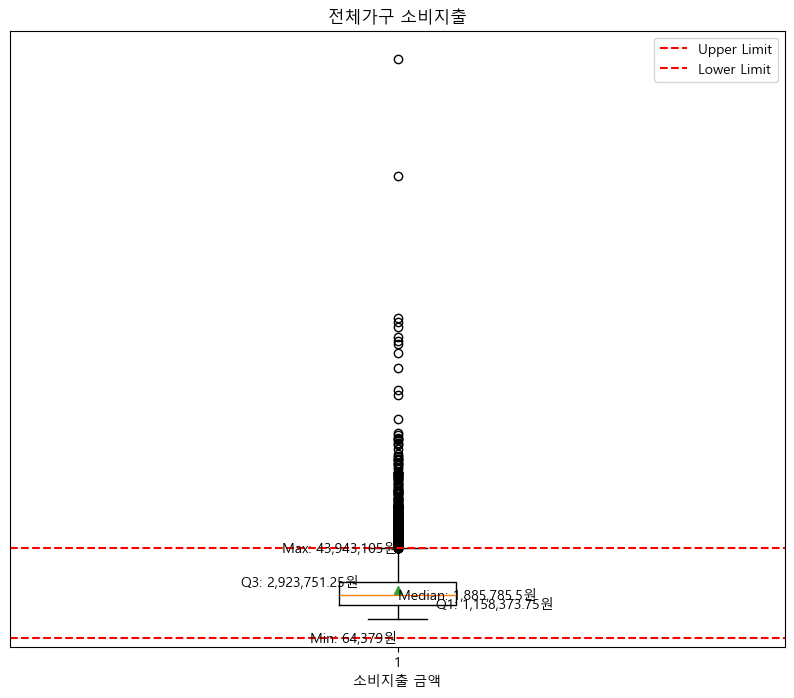

In [67]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(total_expend, 25)
Q3 = np.percentile(total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(total_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")


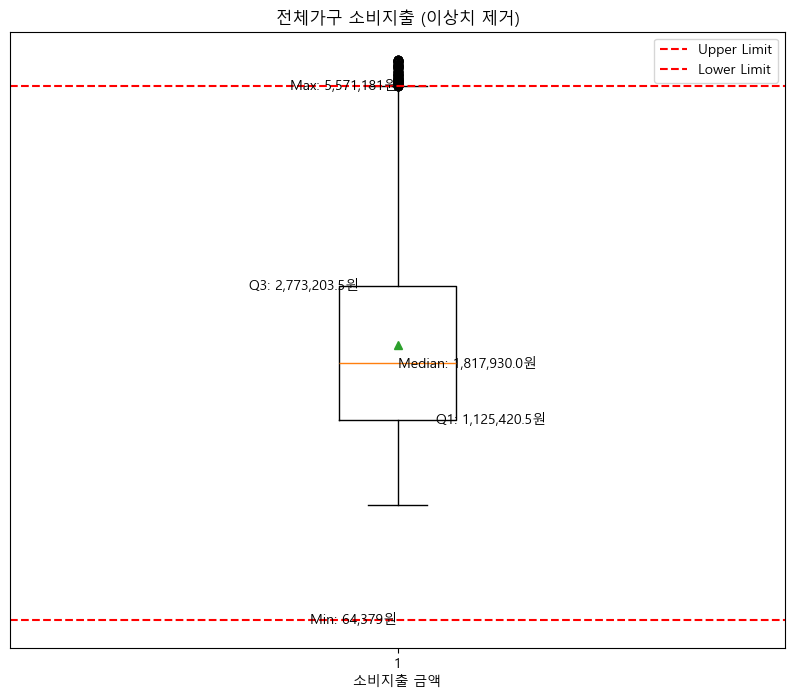

In [68]:
# 이상치 제거
cleaned_total_expend = total_expend[(total_expend >= lower_limit) & (total_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_total_expend, 25)
Q3 = np.percentile(cleaned_total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_total_expend), f'Median: {np.median(cleaned_total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('전체가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [69]:
# 전체가구 평균 소비지출
total_expend_mean = int(total_expend.mean())
print(f"전체가구의 평균 소비지출: {total_expend_mean:,}원")

전체가구의 평균 소비지출: 2,294,545원


1인가구 소비지출

In [72]:
# 가구원수 1로 설정하여 9510개에서 2827개의 데이터 전처리

single_expend = dat_2019.loc[dat['가구원수'] == 1, '소비지출']

single_expend.info # 1인가구 소비지출

<bound method Series.info of 0        451464
2       1358773
4       5875488
5       1180308
12       637191
         ...   
9499    2933981
9500    1009745
9501    1292380
9504     694386
9508    1788251
Name: 소비지출, Length: 2827, dtype: int64>

In [73]:
# 1인가구 이상치 식별
(single_expend < lower_limit) & (single_expend > upper_limit)

0       False
2       False
4       False
5       False
12      False
        ...  
9499    False
9500    False
9501    False
9504    False
9508    False
Name: 소비지출, Length: 2827, dtype: bool

-- 2차전처리 --

* 1인가구 소비지출 이상치확인 (2827개중 2665개) <162개 이상치 식별>

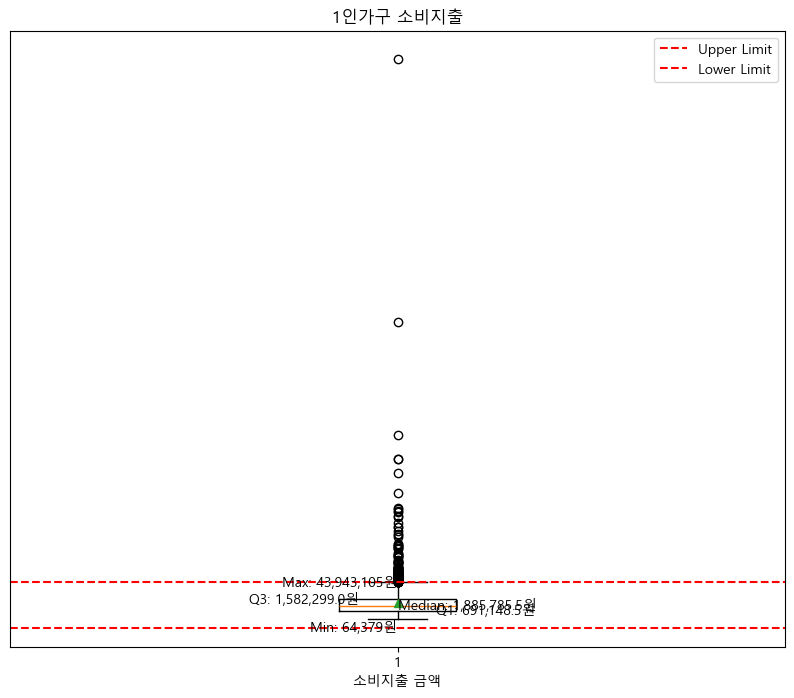

In [74]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(single_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(single_expend, 25)
Q3 = np.percentile(single_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(single_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(single_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(single_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('1인가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")


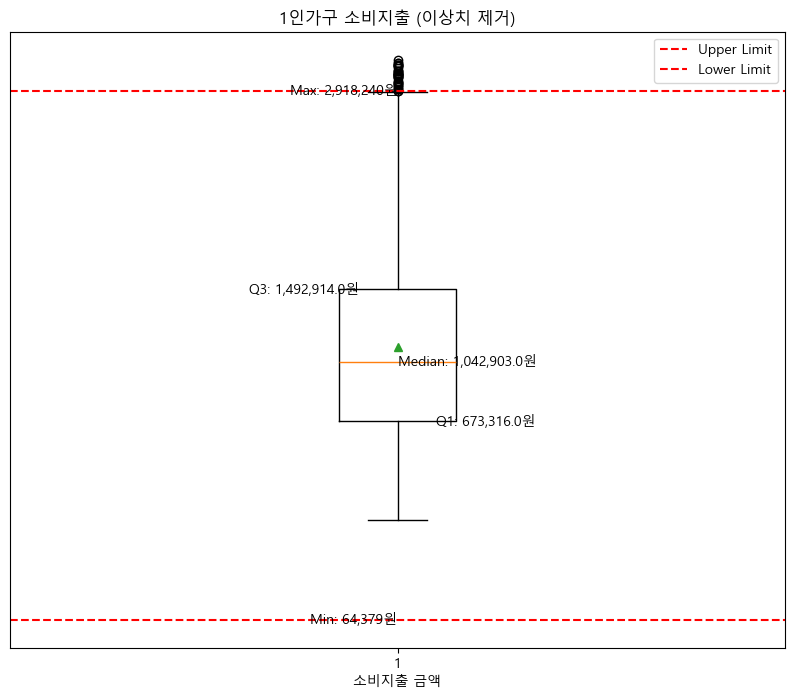

In [75]:
# 이상치 제거
cleaned_single_expend = single_expend[(single_expend >= lower_limit) & (single_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_single_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_single_expend, 25)
Q3 = np.percentile(cleaned_single_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_single_expend), f'Median: {np.median(cleaned_single_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_single_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_single_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('1인가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [76]:
# 1인가구 평균 소비지출
single_expend_mean = int(single_expend.mean())
print('-' * 50)
print(f"1인가구의 평균 소비지출: {single_expend_mean:,}원")

--------------------------------------------------
1인가구의 평균 소비지출: 1,307,691원


전체가구 식료품음료구입 평균소비 비용, 비율

In [77]:
tot_식료품음료구입 = dat_2019['식료품음료구입']
tot_식료품음료구입_mean = int(tot_식료품음료구입.mean())
tot_식료품음료구입_per = (tot_식료품음료구입_mean / total_expend_mean) * 100  # 전체가구 소비 중 식료품음료구입 소비 비율

print(tot_식료품음료구입)
print(tot_식료품음료구입_mean)
print(tot_식료품음료구입_per)

0       153011
1       300713
2       171247
3       155088
4       311939
         ...  
9505    689222
9506    657277
9507    623311
9508    270455
9509    343307
Name: 식료품음료구입, Length: 9510, dtype: int64
330163
14.389040092916025


1인가구 식료품음료구입 평균소비 비용, 비율

In [81]:
sin_tot_식료품음료구입 = dat_2019.loc[dat_2019['가구원수'] == 1, '식료품음료구입']
sin_tot_식료품음료구입_mean = int(sin_tot_식료품음료구입.mean())
sin_tot_식료품음료구입_per = (sin_tot_식료품음료구입_mean / single_expend_mean) * 100  # 1인가구 소비 중 식료품음료구입 소비 비율

print(sin_tot_식료품음료구입)
print(sin_tot_식료품음료구입_mean)
print(sin_tot_식료품음료구입_per)

0       153011
2       171247
4       311939
5       163525
12      170024
         ...  
9499    147440
9500    129670
9501    185910
9504    135465
9508    270455
Name: 식료품음료구입, Length: 2827, dtype: int64
175818
13.444919327272267


In [84]:
print(f"전체가구 소비 중 식료품음료구입 소비지출, 비율: {tot_식료품음료구입_mean:,}원 ({tot_식료품음료구입_per:.2f}%)")
print(f"1인가구 소비 중 식료품음료구입 소비지출, 비율: {sin_tot_식료품음료구입_mean:,}원 ({sin_tot_식료품음료구입_per:.2f}%)")

전체가구 소비 중 식료품음료구입 소비지출, 비율: 330,163원 (14.39%)
1인가구 소비 중 식료품음료구입 소비지출, 비율: 175,818원 (13.44%)


전체가구 주류담배구입 평균소비 비용, 비율

In [88]:
tot_주류담배구입 = dat_2019['주류담배구입']
tot_주류담배구입_mean = int(tot_주류담배구입.mean())
tot_주류담배구입_per = (tot_주류담배구입_mean / total_expend_mean) * 100  # 전체가구 소비 중 주류담배구입 소비 비율

print(tot_주류담배구입)
print(tot_주류담배구입_mean)
print(tot_주류담배구입_per)

0         1142
1          800
2         1594
3         4429
4        55529
         ...  
9505     27333
9506    222713
9507     33882
9508    174718
9509    131605
Name: 주류담배구입, Length: 9510, dtype: int64
34241
1.492278425570211


1인가구 주류담배구입 평균소비 비용, 비율

In [89]:
sin_tot_주류담배구입 = dat_2019.loc[dat_2019['가구원수'] == 1, '주류담배구입']
sin_tot_주류담배구입_mean = int(sin_tot_주류담배구입.mean())
sin_tot_주류담배구입_per = (sin_tot_주류담배구입_mean / single_expend_mean) * 100  # 1인가구 소비 중 기타상품서비스 소비 비율

print(sin_tot_주류담배구입)
print(sin_tot_주류담배구입_mean)
print(sin_tot_주류담배구입_per)

0         1142
2         1594
4        55529
5        11847
12           0
         ...  
9499     86940
9500     39000
9501     30000
9504    143065
9508    174718
Name: 주류담배구입, Length: 2827, dtype: int64
28626
2.189049247872777


In [95]:
print(f"전체가구 소비 중 주류담배구입 소비지출, 비율: {tot_주류담배구입_mean:,}원 ({tot_주류담배구입_per:.2f}%)")
print(f"1인가구 소비 중 주류담배구입 소비지출, 비율: {sin_tot_주류담배구입_mean:,}원 ({sin_tot_주류담배구입_per:.2f}%)")

전체가구 소비 중 주류담배구입 소비지출, 비율: 34,241원 (1.49%)
1인가구 소비 중 주류담배구입 소비지출, 비율: 28,626원 (2.19%)


전체가구 의류신발구입 평균소비 비용, 비율

In [96]:
tot_의류신발구입 = dat_2019['의류신발구입']
tot_의류신발구입_mean = int(tot_의류신발구입.mean())
tot_의류신발구입_per = (tot_의류신발구입_mean / total_expend_mean) * 100  # 전체가구 소비 중 주류담배구입 소비 비율

print(tot_의류신발구입)
print(tot_의류신발구입_mean)
print(tot_의류신발구입_per)

0        21833
1        45300
2        86571
3        35060
4       367754
         ...  
9505     73956
9506    107586
9507    491053
9508     50709
9509      2591
Name: 의류신발구입, Length: 9510, dtype: int64
131953
5.750726178828482


1인가구 의류신발구입 평균소비 비용, 비율

In [105]:
sin_tot_의류신발구입 = dat_2019.loc[dat_2019['가구원수'] == 1, '의류신발구입']
sin_tot_의류신발구입_mean = int(sin_tot_의류신발구입.mean())
sin_tot_의류신발구입_per = (sin_tot_의류신발구입_mean / single_expend_mean) * 100  # 1인가구 소비 중 기타상품서비스 소비 비율

print(sin_tot_의류신발구입)
print(sin_tot_의류신발구입_mean)
print(sin_tot_의류신발구입_per)

0        21833
2        86571
4       367754
5         8177
12       29400
         ...  
9499    144780
9500         0
9501    152000
9504      2800
9508     50709
Name: 의류신발구입, Length: 2827, dtype: int64
66339
5.072987425928602


In [106]:
print(f"전체가구 소비 중 의류신발구입 소비지출, 비율: {tot_의류신발구입_mean:,}원 ({tot_의류신발구입_per:.2f}%)")
print(f"1인가구 소비 중 의류신발구입 소비지출, 비율: {sin_tot_의류신발구입_mean:,}원 ({sin_tot_의류신발구입_per:.2f}%)")

전체가구 소비 중 의류신발구입 소비지출, 비율: 131,953원 (5.75%)
1인가구 소비 중 의류신발구입 소비지출, 비율: 66,339원 (5.07%)


전체가구 주거수도광열비 평균소비 비용, 비율

In [99]:
tot_주거수도광열비 = dat_2019['주거수도광열비']
tot_주거수도광열비_mean = int(tot_주거수도광열비.mean())
tot_주거수도광열비_per = (tot_주거수도광열비_mean / total_expend_mean) * 100  # 전체가구 소비 중 주류담배구입 소비 비율

print(tot_주거수도광열비)
print(tot_주거수도광열비_mean)
print(tot_주거수도광열비_per)

0        79220
1       302318
2       506276
3       117620
4       368676
         ...  
9505    140402
9506    137099
9507    466607
9508    135583
9509     57155
Name: 주거수도광열비, Length: 9510, dtype: int64
261760
11.407926190159705


1인가구 주거수도광열비 평균소비 비용, 비율

In [107]:
sin_tot_주거수도광열비 = dat_2019.loc[dat_2019['가구원수'] == 1, '주거수도광열비']
sin_tot_주거수도광열비_mean = int(sin_tot_주거수도광열비.mean())
sin_tot_주거수도광열비_per = (sin_tot_주거수도광열비_mean / single_expend_mean) * 100  # 1인가구 소비 중 기타상품서비스 소비 비율

print(sin_tot_주거수도광열비)
print(sin_tot_주거수도광열비_mean)
print(sin_tot_주거수도광열비_per)

0        79220
2       506276
4       368676
5       409643
12      268340
         ...  
9499    179690
9500    161150
9501     78560
9504    168001
9508    135583
Name: 주거수도광열비, Length: 2827, dtype: int64
237834
18.18732406967701


In [108]:
print(f"전체가구 소비 중 주거수도광열비 소비지출, 비율: {tot_주거수도광열비_mean:,}원 ({tot_주거수도광열비_per:.2f}%)")
print(f"1인가구 소비 중 주거수도광열비 소비지출, 비율: {sin_tot_주거수도광열비_mean:,}원 ({sin_tot_주거수도광열비_per:.2f}%)")

전체가구 소비 중 주거수도광열비 소비지출, 비율: 261,760원 (11.41%)
1인가구 소비 중 주거수도광열비 소비지출, 비율: 237,834원 (18.19%)


전체가구 가정용품가사서비스이용 평균소비 비용, 비율

In [102]:
tot_가정용품가사서비스이용 = dat_2019['가정용품가사서비스이용']
tot_가정용품가사서비스이용_mean = int(tot_가정용품가사서비스이용.mean())
tot_가정용품가사서비스이용_per = (tot_가정용품가사서비스이용_mean / total_expend_mean) * 100  # 전체가구 소비 중 주류담배구입 소비 비율

print(tot_가정용품가사서비스이용)
print(tot_가정용품가사서비스이용_mean)
print(tot_가정용품가사서비스이용_per)

0          8013
1         26840
2         35007
3         12674
4       2808527
         ...   
9505      89460
9506      73629
9507      81907
9508      12647
9509      28841
Name: 가정용품가사서비스이용, Length: 9510, dtype: int64
113575
4.949783072460989


1인가구 가정용품가사서비스이용 평균소비 비용, 비율

In [109]:
sin_tot_가정용품가사서비스이용 = dat_2019.loc[dat_2019['가구원수'] == 1, '가정용품가사서비스이용']
sin_tot_가정용품가사서비스이용_mean = int(sin_tot_가정용품가사서비스이용.mean())
sin_tot_가정용품가사서비스이용_per = (sin_tot_가정용품가사서비스이용_mean / single_expend_mean) * 100  # 1인가구 소비 중 기타상품서비스 소비 비율

print(sin_tot_가정용품가사서비스이용)
print(sin_tot_가정용품가사서비스이용_mean)
print(sin_tot_가정용품가사서비스이용_per)

0          8013
2         35007
4       2808527
5        129128
12        16806
         ...   
9499      24750
9500      37000
9501       6000
9504      17992
9508      12647
Name: 가정용품가사서비스이용, Length: 2827, dtype: int64
62826
4.804345980816569


In [110]:
print(f"전체가구 소비 중 가정용품가사서비스이용 소비지출, 비율: {tot_가정용품가사서비스이용_mean:,}원 ({tot_가정용품가사서비스이용_per:.2f}%)")
print(f"1인가구 소비 중 가정용품가사서비스이용 소비지출, 비율: {sin_tot_가정용품가사서비스이용_mean:,}원 ({sin_tot_가정용품가사서비스이용_per:.2f}%)")

전체가구 소비 중 가정용품가사서비스이용 소비지출, 비율: 113,575원 (4.95%)
1인가구 소비 중 가정용품가사서비스이용 소비지출, 비율: 62,826원 (4.80%)


전체가구 보건제품구입 평균소비 비용, 비율

In [111]:
tot_보건제품구입 = dat_2019['보건제품구입']
tot_보건제품구입_mean = int(tot_보건제품구입.mean())
tot_보건제품구입_per = (tot_보건제품구입_mean / total_expend_mean) * 100  # 전체가구 소비 중 주류담배구입 소비 비율

print(tot_보건제품구입)
print(tot_보건제품구입_mean)
print(tot_보건제품구입_per)

0        16733
1       139575
2        66304
3        39010
4       272351
         ...  
9505     61709
9506     59520
9507    293552
9508     56918
9509    125686
Name: 보건제품구입, Length: 9510, dtype: int64
206698
9.00823474806552


1인가구 보건제품구입 평균소비 비용, 비율

In [112]:
sin_tot_보건제품구입 = dat_2019.loc[dat_2019['가구원수'] == 1, '보건제품구입']
sin_tot_보건제품구입_mean = int(sin_tot_보건제품구입.mean())
sin_tot_보건제품구입_per = (sin_tot_보건제품구입_mean / single_expend_mean) * 100  # 1인가구 소비 중 기타상품서비스 소비 비율

print(sin_tot_보건제품구입)
print(sin_tot_보건제품구입_mean)
print(sin_tot_보건제품구입_per)

0        16733
2        66304
4       272351
5         9933
12       87480
         ...  
9499     72500
9500         0
9501    127100
9504     14699
9508     56918
Name: 보건제품구입, Length: 2827, dtype: int64
118033
9.026061967238439


In [113]:
print(f"전체가구 소비 중 보건제품구입 소비지출, 비율: {tot_보건제품구입_mean:,}원 ({tot_보건제품구입_per:.2f}%)")
print(f"1인가구 소비 중 보건제품구입 소비지출, 비율: {sin_tot_보건제품구입_mean:,}원 ({sin_tot_보건제품구입_per:.2f}%)")

전체가구 소비 중 보건제품구입 소비지출, 비율: 206,698원 (9.01%)
1인가구 소비 중 보건제품구입 소비지출, 비율: 118,033원 (9.03%)


In [116]:
# col = ['2019']
# index = ['소비지출','식료품음료구입','주류담배구입','의류신발구입','주거수도광열비','가정용품가사서비스이용','보건제품구입','교통비','통신비','오락문화비','교육비','음식숙박비',
#          '기타상품서비스이용','비소비지출금액']
# content = [[total_expend_mean],[tot_식료품음료구입_mean],[tot_주류담배구입_mean],[tot_의류신발구입_mean],[tot_주거수도광열비_mean],[tot_가정용품가사서비스이용_mean],[tot_보건제품구입_mean],
#            [tot_교통비_mean],[tot_통신비_mean],[tot_오락문화비_mean],[tot_교육비_mean],[tot_음식숙박비_mean],[tot_기타상품서비스이용_mean],[tot_비소비지출금액_mean]]

In [141]:
col = [['2019','2019'],['전체가구','1인가구']]
ind = ['소비지출','식료품음료구입','주류담배구입','의류신발구입','주거수도광열비','가정용품가사서비스이용','보건제품구입']
content = [[total_expend_mean,single_expend_mean],[tot_식료품음료구입_mean,sin_tot_식료품음료구입_mean],[tot_주류담배구입_mean,sin_tot_주류담배구입_mean],
           [tot_의류신발구입_mean,sin_tot_의류신발구입_mean],[tot_주거수도광열비_mean,sin_tot_주거수도광열비_mean],[tot_가정용품가사서비스이용_mean,sin_tot_가정용품가사서비스이용_mean],
           [tot_보건제품구입_mean,sin_tot_보건제품구입_mean]]

In [153]:
df_2019_소비 = pd.DataFrame(content,columns=col,index=ind)
df_2019_소비

2019         
                전체가구     1인가구
소비지출         2294545  1307691
식료품음료구입       330163   175818
주류담배구입         34241    28626
의류신발구입        131953    66339
주거수도광열비       261760   237834
가정용품가사서비스이용   113575    62826
보건제품구입        206698   118033

In [143]:
col_rate = [['2019','2019'],['전체가구','1인가구']]
ind_rate = ['소비지출','식료품음료구입','주류담배구입','의류신발구입','주거수도광열비','가정용품가사서비스이용','보건제품구입']
content_rate = [[total_expend_mean,single_expend_mean],[tot_식료품음료구입_per,sin_tot_식료품음료구입_per],[tot_주류담배구입_per,sin_tot_주류담배구입_per],
           [tot_의류신발구입_per,sin_tot_의류신발구입_per],[tot_주거수도광열비_per,sin_tot_주거수도광열비_per],[tot_가정용품가사서비스이용_per,sin_tot_가정용품가사서비스이용_per],
           [tot_보건제품구입_per,sin_tot_보건제품구입_per]]

In [154]:
df_2019_소비비율 = pd.DataFrame(content_rate,columns=col_rate,index=ind_rate)
df_2019_소비비율

2019                 
                        전체가구             1인가구
소비지출        2294545.00000000 1307691.00000000
식료품음료구입          14.38904009      13.44491933
주류담배구입            1.49227843       2.18904925
의류신발구입            5.75072618       5.07298743
주거수도광열비          11.40792619      18.18732407
가정용품가사서비스이용       4.94978307       4.80434598
보건제품구입            9.00823475       9.02606197

In [158]:
df_2019_소비비율.round(2)

2019                 
                        전체가구             1인가구
소비지출        2294545.00000000 1307691.00000000
식료품음료구입          14.39000000      13.44000000
주류담배구입            1.49000000       2.19000000
의류신발구입            5.75000000       5.07000000
주거수도광열비          11.41000000      18.19000000
가정용품가사서비스이용       4.95000000       4.80000000
보건제품구입            9.01000000       9.03000000

전체가구 교통비 평균소비 비용, 비율

In [ ]:
tot_교통비 = dat_2019['교통비']
tot_교통비_mean = int(tot_교통비.mean())
tot_교통비_per = (tot_교통비_mean / total_expend_mean) * 100  # 전체가구 소비 중 식료품음료구입 소비 비율

print(tot_교통비)
print(tot_교통비_mean)
print(tot_교통비_per)

0       153011
1       300713
2       171247
3       155088
4       311939
         ...  
9505    689222
9506    657277
9507    623311
9508    270455
9509    343307
Name: 식료품음료구입, Length: 9510, dtype: int64
330163
14.389040092916025


1인가구 식료품음료구입 평균소비 비용, 비율

In [ ]:
sin_tot_식료품음료구입 = dat_2019.loc[dat_2019['가구원수'] == 1, '교통비']
sin_tot_식료품음료구입_mean = int(sin_tot_식료품음료구입.mean())
sin_tot_식료품음료구입_per = (sin_tot_식료품음료구입_mean / single_expend_mean) * 100  # 1인가구 소비 중 식료품음료구입 소비 비율

print(sin_tot_식료품음료구입)
print(sin_tot_식료품음료구입_mean)
print(sin_tot_식료품음료구입_per)

0       153011
2       171247
4       311939
5       163525
12      170024
         ...  
9499    147440
9500    129670
9501    185910
9504    135465
9508    270455
Name: 식료품음료구입, Length: 2827, dtype: int64
175818
13.444919327272267


In [ ]:
print(f"전체가구 소비 중 식료품음료구입 소비지출, 비율: {tot_식료품음료구입_mean:,}원 ({tot_식료품음료구입_per:.2f}%)")
print(f"1인가구 소비 중 식료품음료구입 소비지출, 비율: {sin_tot_식료품음료구입_mean:,}원 ({sin_tot_식료품음료구입_per:.2f}%)")

전체가구 소비 중 식료품음료구입 소비지출, 비율: 330,163원 (14.39%)
1인가구 소비 중 식료품음료구입 소비지출, 비율: 175,818원 (13.44%)
